
<h1><center>
 Estimación de petróleo original en el lugar (OIP) por medio del metodo de volumetrias
</center></h1>

## Introducción

<p style='text-align: justify;'>

¿Cómo se sabe cuánto petróleo original en el lugar (OIP) está presente en nuestro reservorio? Existen dos métodos de cálculo de hidrocarburos in situ llamados "estáticos" y "dinámicos". El método estático es conocido por los geólogos y geofísicos como el método volumétrico. 
    
para el calculo del (OIP) basado en el método estáticos, se consideran las siguientes variables de interes:
    
    * A es el área del embalse(Yacimiento)
    * h es el espesor del yacimiento
    * ϕ es la porosidad
    * Sw es la saturación de agua
    * Bo (el Factor de volumen de formación(FVF) de petrolio)
   
A partir de las problematicas en la industria de oil and  gas, la predicción temprana del volumen de  petrolio presente en un yacimiento es indispensable, debido a  que da indicios sobre las consertraciones de hidrocarburos sobre el subsuelo. Ademas,  de  permitir realizar análisis de balance en la extracción o producción del crudo una vez intervenido el yacimiento. Así que,    ya que las soluciones computacionales estan tranformando el enfoque de análisis de datos para brindar mayor certeza en los procesos, es pertinente la implementación de  métodos de analitica avanzada que permitan ejecutar de forma efectiva la operación.

In [1]:
## Cargue de  librerias necesarias para el analisis y los datos previos
import pandas  as pd
import numpy as  np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
from volumetrics.volumetrics import get_contours, compute_area, trapezoid, pyramidal, simpson


welldat =  pd.read_csv("Data/volumetric_data.csv")


----------------------------------------------------------------------------------------


,well_id,x,y,depth,h,poro,sw
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,7.083333,2400.000000,2674.166667,-4937.500000,29.083333,0.185417,0.607500
std,4.907477,1679.567044,2424.756626,91.266343,9.755729,0.060144,0.370064
min,1.000000,0.000000,-2000.000000,-5100.000000,11.000000,0.023000,0.200000
25%,3.750000,915.000000,1182.500000,-5002.500000,23.750000,0.187500,0.227500
50%,6.500000,2420.000000,2820.000000,-4910.000000,26.500000,0.200000,0.575000
75%,9.250000,3250.000000,4617.500000,-4872.500000,34.500000,0.215000,1.000000
max,19.000000,5500.000000,6500.000000,-4800.000000,45.000000,0.242000,1.000000


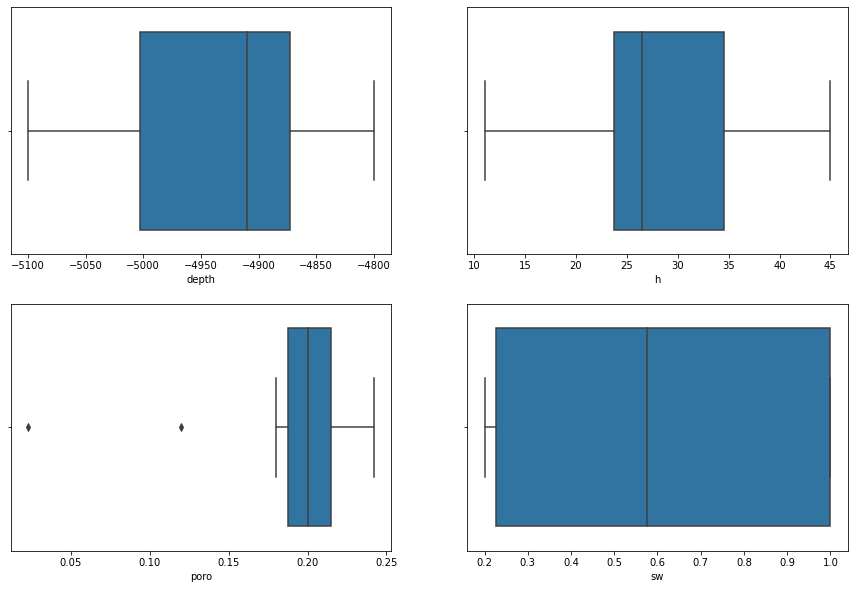

In [18]:
##boxplots de  las variables de interes 
# h = espesor del yacimiento
#depth = profundidad del yacimiento
#poro = porosidad
#sw = saturacion de  agua
columns = ['depth', 'h', 'poro', 'sw']

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
for col, subplot in zip(columns, ax.flatten()):
    sns.boxplot(x= welldat[col], ax=subplot)
    
print('----------------------------------------------------------------------------------------')     
welldat.describe()    



In [19]:
#Asignacion de  variables a utilizar para el calculo de  volumetria OIP
x, y, z, h, poro, sw = welldat.x, welldat.y, welldat.depth, welldat.h, welldat.poro, welldat.sw

# conocido factor de volumen de formación de petróleo, bbl/STB
#STB = barrir de tanque en almacenamiento
Bo = 1.435 # in RB/STB

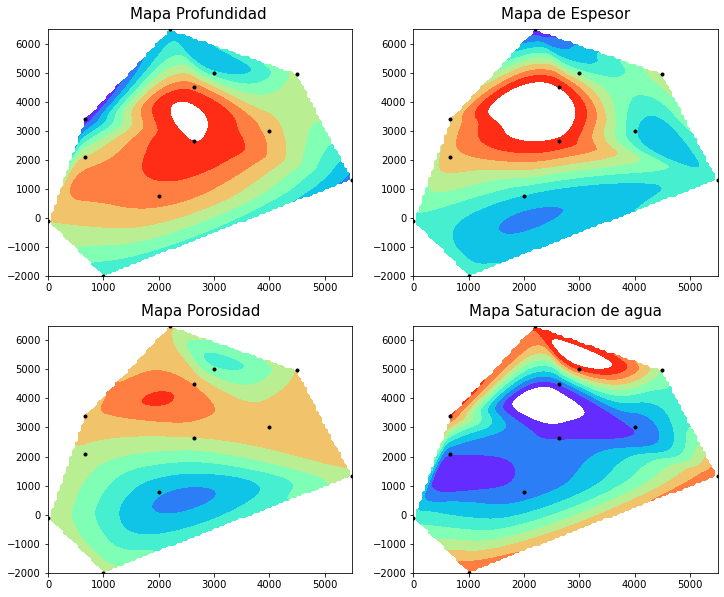

In [20]:
#### grafico de superfiecie del yacimiento 

# define the z values for plotting
z_ = np.array([[z, h],
               [poro, sw]])


# grid x and y coordinate data
xi = np.linspace(min(x), max(x), 100)
yi = np.linspace(min(y), max(y), 100)
x_i, y_i = np.meshgrid(xi, yi)


# define subplots and colormap
figs, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,10))


# define each subplot title
title = np.array([['Mapa Profundidad ', 'Mapa de Espesor'],
                  ['Mapa Porosidad', 'Mapa Saturacion de agua']])


for i in range(2):
    for j in range(2):
        zi = griddata((x,y), z_[i,j], (x_i,y_i), method='cubic')
        levels = np.linspace(min(z_[i,j])-0.1, max(z_[i,j])+0.1, 10)
        ax[i,j].contourf(x_i, y_i, zi, levels=levels, cmap='rainbow')  
        ax[i,j].plot(x, y, 'ko', ms=3) # plot the well points
        ax[i,j].set_title(title[i,j], pad=10, size=15)

In [21]:
##### calculo estimado de cantidad de petrolio original (OIP) por unidad de área de cada pozo individual
N = h * poro * (1 - sw) / Bo
N = N * (1 / 5.61458) # convert the result from ft3/ft2 to standard STB/ft2
df = pd.DataFrame({"well_id": welldat.well_id, "N (STB/ft2)": N})
df = pd.merge(welldat, df, on='well_id')
df

,well_id,x,y,depth,h,poro,sw,N (STB/ft2)
0,1,0.0,-110.0,-4900,25,0.200,0.50,0.310292
1,2,4500.0,4970.0,-4920,33,0.205,0.65,0.293878
2,3,2640.0,2640.0,-4800,44,0.200,0.20,0.873783
3,4,660.0,2100.0,-4900,36,0.190,0.22,0.662188
4,5,2000.0,770.0,-4850,22,0.023,0.27,0.045846
5,6,2640.0,4500.0,-4850,45,0.242,0.23,1.040757
6,7,4000.0,3000.0,-4880,23,0.235,0.22,0.523264
7,8,660.0,3400.0,-5100,34,0.230,1.00,0.000000
8,9,5500.0,1320.0,-5050,24,0.190,1.00,0.000000
9,10,2200.0,6500.0,-5010,11,0.210,1.00,0.000000


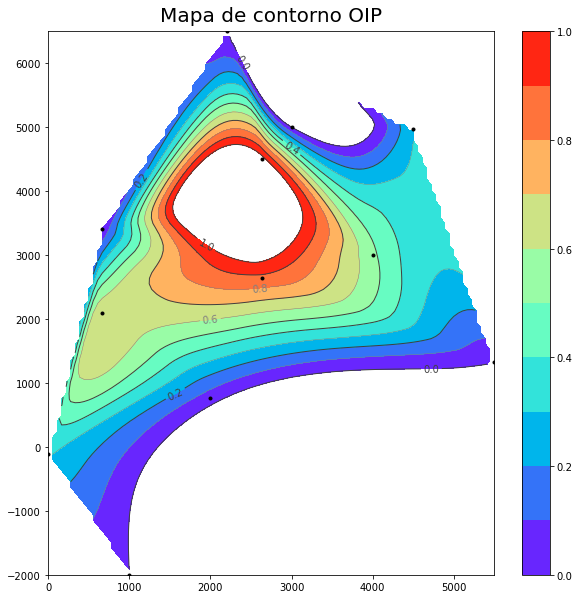

In [24]:
# definicion de los valores de z para el grafico de OIP  por area 
z = N 
# generado de la grilla para N datos con  el metodo de interpolacion cubica 
zi = griddata((x,y),z,(x_i,y_i),method='cubic')


levels = np.arange(0, 1.1, 0.1)


# mapa de origen de petroleo en el lugar (OIP) por area
plt.figure(figsize=(10, 10))
figs = plt.contour(x_i, y_i, zi, levels=levels, colors=['0.25', '0.5', '0.25', '0.5', '0.25'], linewidths=[1.0, 0.5, 1, 0.5, 1])
plt.contourf(x_i,y_i,zi,levels=levels, cmap="rainbow")
plt.plot(x, y, 'ko', ms=3) # plot the well points
plt.clabel(figs, figs.levels[::2], inline=1, fontsize=10) # give labels for contours
plt.title("Mapa de contorno OIP", pad=10, size=20)
plt.colorbar()
plt.show()

In [27]:
# calculo de areas  cercanas a los puntos d e referencia  por medio de la interpolacion 
contour_all = get_contours(figs, x_i, y_i, plot='No')
contour_area = compute_area(contour_all)


areas = pd.DataFrame({"OIP Contour(STB)": levels, "Area(ft2)": contour_area})
areas

,OIP Contour(STB),Area(ft2)
0,0.0,1.761776e+07
1,0.1,7.834510e+06
2,0.2,1.000735e+07
3,0.3,8.209183e+06
4,0.4,1.105959e+07
5,0.5,9.068078e+06
6,0.6,7.225491e+06
7,0.7,5.017789e+06
8,0.8,3.771974e+06
9,0.9,2.801986e+06


In [28]:
# aplicacion de  metos  para determinar el OIP
oip_trapezo = trapezoid(contour_area, 0.1)
oip_pyramidal = pyramidal(contour_area, 0.1)
oip_simpson = simpson(contour_area, 0.1)
##############################################################################
#____________________ estimacion de OIP del yacimiento_______________________#
print("OIP estimado por metodo Trapezoidal :", np.round((oip_trapezo / 1E+06), 3), "millones STB")
print("OIP estimado por metodo Pyramidal:", np.round((oip_pyramidal / 1E+06), 3), "millones STB")
print("OIP estimado por metodo Simpson 1/3:", np.round((oip_simpson / 1E+06), 3), "millones STB")


OIP estimado por metodo Trapezoidal : 7.484 millones STB
OIP estimado por metodo Pyramidal: 7.434 millones STB
OIP estimado por metodo Simpson 1/3: 7.185 millones STB
